# Lezione 08

## Dario Pullia

### Esercizio 08.1

Spiegazioni varie

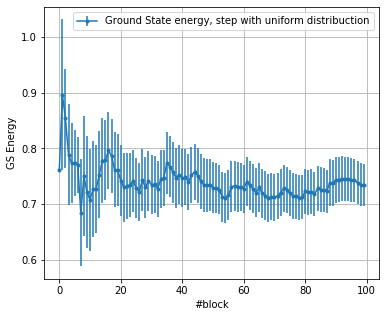

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

N=100
E, ErrorE = np.loadtxt("data01/data01.dat",  usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(6, 5))

plt.errorbar(x,E,marker=".", yerr=ErrorE, label="Ground State energy, step with uniform distribuction")

plt.xlabel('#block')
plt.ylabel('GS Energy')
#plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

Scelgo che mi va bene l'errore finale, ottenuto con 100000 punti

### Esercizio 08.2

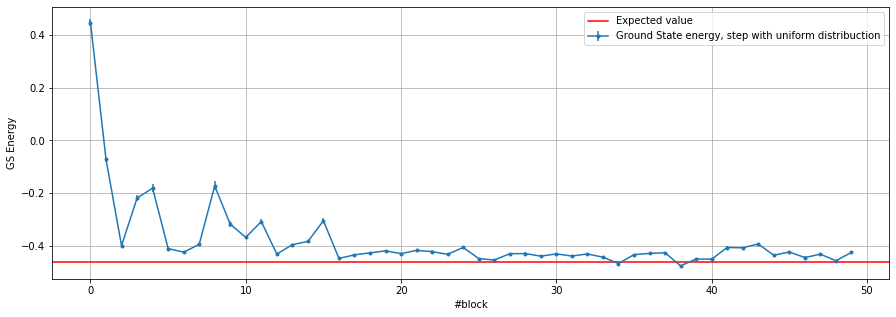

In [3]:
E, ErrorE = np.loadtxt("data02/data02.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(50) 
fig=plt.figure(figsize=(15, 5))

plt.errorbar(x,E, yerr=ErrorE,marker=".", label="Ground State energy, step with uniform distribuction")

plt.xlabel('#block')
plt.ylabel('GS Energy')
plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.grid(True)
plt.legend()
plt.show()

Stiamo sempre sopra perchè il GS è il minimo delle energie, quindi le mie misure stanno o lì o sopra, mai sotto. Se diminuisco i punti vado anche sotto perchè misuro male

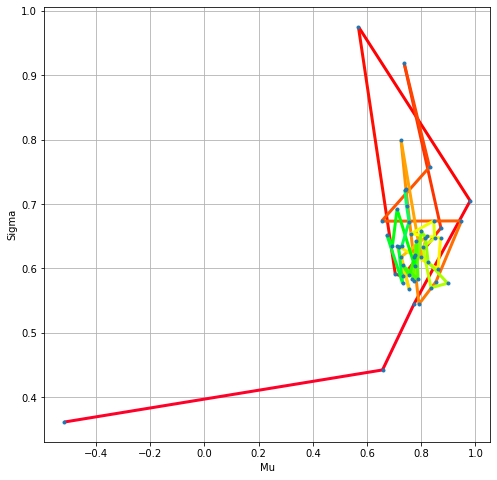

In [4]:
Mu, Sig = np.loadtxt("data02/data02_MuSig.dat", usecols=(0,1), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(8,8))

plt.plot(Mu, Sig,marker=".", linewidth=0)

plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([Mu, Sig]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

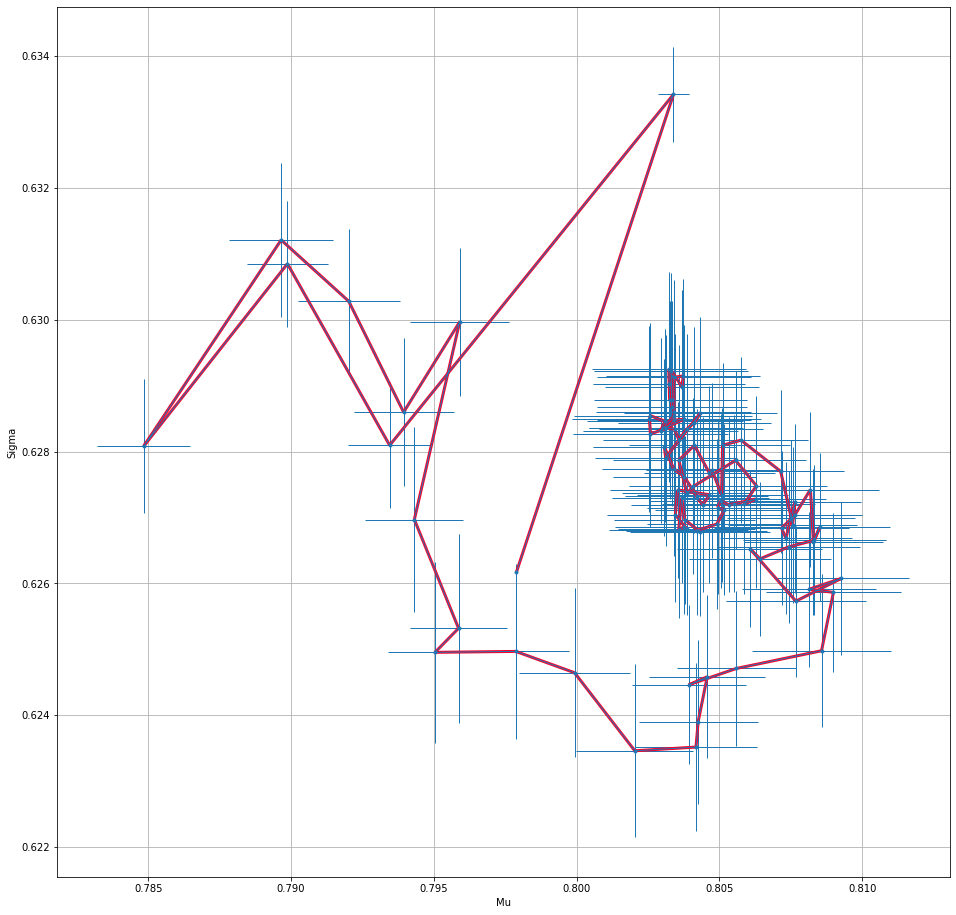

In [14]:
MuFinal, MuFinalErr, SigFinal, SigFinalErr = np.loadtxt("data02/data02_MuSigFinal.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(16,16))

plt.errorbar(MuFinal, SigFinal,yerr=SigFinalErr,xerr=MuFinalErr,marker=".", linewidth=1)

plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
points = np.array([MuFinal, SigFinal]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=plt.get_cmap('gist_rainbow'),
    norm=plt.Normalize(0, N))
lc.set_array(x)
lc.set_linewidth(3)
plt.gca().add_collection(lc)

plt.show()

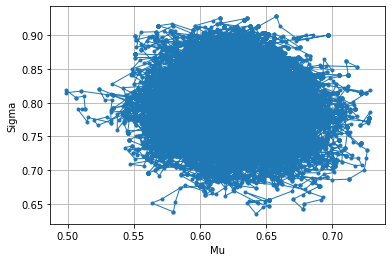

In [15]:
MuInsta, SigInsta, XInsta = np.loadtxt("data02/data02_MuSigInstant.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

x = np.arange(40000) 

plt.plot(SigInsta, MuInsta,marker=".", linewidth=1)

plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()


plt.show()

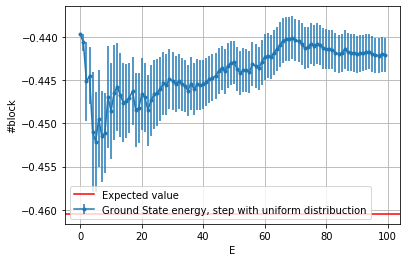

In [16]:
EFin, ErrorEFin = np.loadtxt("data02/data02_EnergyOPT.dat", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(100) 


plt.errorbar(x,EFin,marker=".", yerr=ErrorEFin, label="Ground State energy, step with uniform distribuction")
plt.axhline(y = -0.46046587969271513, color = 'r', linestyle = '-',label="Expected value")
plt.xlabel('E')
plt.ylabel('#block')
plt.grid(True)
plt.legend()
plt.show()

0.803335 0.62867
[0.38634137 0.80965297 0.6209324 ]


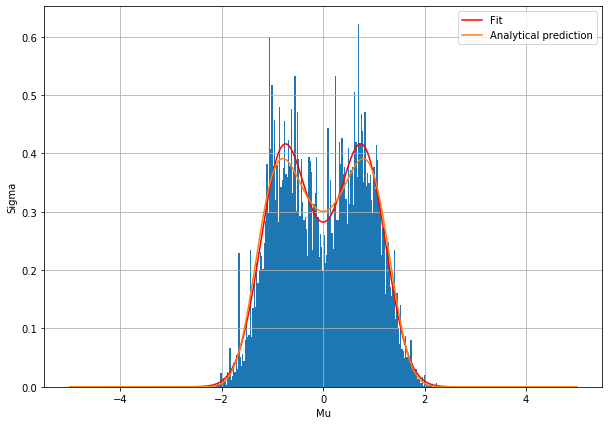

In [47]:

def PSI2(x,N,mu, sig):
    return N*((np.exp(-((x-mu)**2/(2*sig**2))))+(np.exp(-((x+mu)**2/(2*sig**2)))))**2
    

plt.figure(figsize=(10,7))
    
    
x=plt.hist(XInsta,bins=200, density='true')
x_interval_for_fit = np.linspace(x[1][0], x[1][-1], 200)
popt, pcov = curve_fit(PSI2, x_interval_for_fit, x[0])


print(MuFinal[-1], SigFinal[-1])
print(popt)


plt.plot(x_interval_for_fit,PSI2(x_interval_for_fit,*popt), color='red', label='Fit')
#Copia incolla della soluzione del prof
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label='Analytical prediction')



plt.legend()
  
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.grid(True)
#plt.legend()
plt.show()